##StyleGAN

The Style Generative Adversarial Network, or StyleGAN for short, is an extension to the GAN architecture that proposes large changes to the generator model, including the use of a mapping network to map points in latent space to an intermediate latent space, the use of the intermediate latent space to control style at each point in the generator model, and the introduction to noise as a source of variation at each point in the generator model.

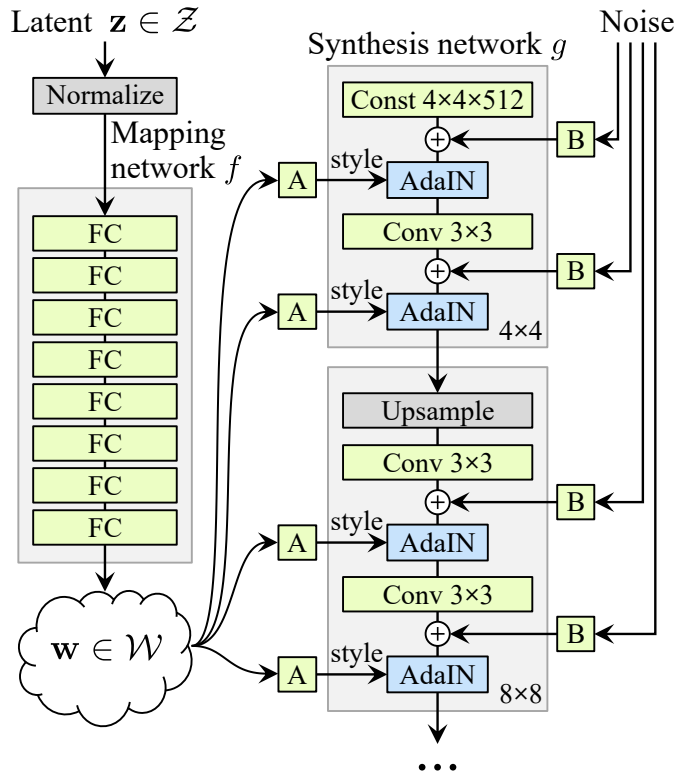

##Training

In [1]:
%tensorflow_version 1.x
import tensorflow
print(tensorflow.__version__)

!git clone https://github.com/NVlabs/stylegan.git
!ls /content/stylegan/
# !rm -rf /content/stylegan

TensorFlow 1.x selected.
1.15.2
Cloning into 'stylegan'...
remote: Enumerating objects: 83, done.
remote: Total 83 (delta 0), reused 0 (delta 0), pack-reused 83
Unpacking objects: 100% (83/83), done.
config.py	     LICENSE.txt	    run_metrics.py
dataset_tool.py      metrics		    stylegan-teaser.png
dnnlib		     pretrained_example.py  training
generate_figures.py  README.md		    train.py


In [2]:
import sys
sys.path.insert(0, "/content/stylegan")
import dnnlib

# !unrar x "/content/drive/My Drive/CustomDataset.rar" "/content/CData/"
!cp /content/drive/MyDrive/Projects/rasenGAN/dataset.zip .
!unzip /content/dataset.zip

import os
import cv2
from tqdm import tqdm
import cv2
from PIL import Image
# from resizeimage import resizeimage
path = '/content/dataset/'
for filename in tqdm(os.listdir(path),desc ='reading images ...'):
    image = cv2.imread(path+filename)
    if image is not None:
        image = cv2.resize(image, (256,256))
        # image.save(path+filename, image.format)
        cv2.imwrite(path+filename, image)

Archive:  /content/dataset.zip
   creating: dataset/
  inflating: dataset/rasengan24.jpg  
  inflating: __MACOSX/dataset/._rasengan24.jpg  
  inflating: dataset/rasengan30.jpg  
  inflating: __MACOSX/dataset/._rasengan30.jpg  
  inflating: dataset/rasengan18.jpg  
  inflating: __MACOSX/dataset/._rasengan18.jpg  
  inflating: dataset/rasengan19.jpg  
  inflating: __MACOSX/dataset/._rasengan19.jpg  
  inflating: dataset/rasengan31.jpg  
  inflating: __MACOSX/dataset/._rasengan31.jpg  
  inflating: dataset/rasengan25.jpg  
  inflating: __MACOSX/dataset/._rasengan25.jpg  
  inflating: dataset/rasengan33.jpg  
  inflating: __MACOSX/dataset/._rasengan33.jpg  
  inflating: dataset/rasengan27.jpg  
  inflating: __MACOSX/dataset/._rasengan27.jpg  
  inflating: dataset/rasengan26.jpg  
  inflating: __MACOSX/dataset/._rasengan26.jpg  
  inflating: dataset/rasengan32.jpg  
  inflating: __MACOSX/dataset/._rasengan32.jpg  
  inflating: dataset/rasengan36.jpg  
  inflating: __MACOSX/dataset/._rasenga

reading images ...: 100%|██████████| 51/51 [00:00<00:00, 323.45it/s]


In [3]:
! python /content/stylegan/dataset_tool.py create_from_images /content/stylegan/datasets/custom-dataset /content/dataset




Loading images from "/content/dataset"
Creating dataset "/content/stylegan/datasets/custom-dataset"



Added 50 images.


In stylegan/train.py, line no. 37, replace:

desc += '-ffhq'; dataset = EasyDict(tfrecord_dir='ffhq'); 

with 

desc += '-/content/stylegan/datasets/custom-dataset'; dataset = EasyDict(tfrecord_dir='/content/stylegan/datasets/custom-dataset');

In stylegan/metrics/frechet_inception_distance.py line no. 29, replace:

inception = misc.load_pkl('< drive link >')

with 

inception = misc.load_pkl('/content/inception_v3_features.pkl')

In [4]:
!cp /content/drive/MyDrive/Projects/rasenGAN/inception_v3_features.pkl .
!cp /content/drive/MyDrive/Projects/rasenGAN/network-snapshot-004224.pkl .

In [ ]:
!python /content/stylegan/train.py




Creating the run dir: results/00001-sgan-/content/stylegan/datasets/custom-dataset-1gpu
Copying files to the run dir
dnnlib: Running training.training_loop.training_loop() on localhost...



Streaming data using training.dataset.TFRecordDataset...


Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`





Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Instructions for updating:
Use `tf.compat.v1.data.get_output_types(dataset)`.
Instructions for updating:
Use `tf.compat.v1.data.get_output_shapes(dataset)`.
Instructions for updating:
Use `tf.compat.v1.data.get_output_types(iterator)`.
Instructions for updating:
Use `tf.compat.v1.data.get_output_shapes(iterator)`.
Instructions for updating:
Use `tf.compat.v1.data.get_output_classes(iterator)`.
Dataset shape = [3, 256, 256]
Dynamic range = [0, 255]
Label size    = 0
Loading networks from "/content/network-snapshot-004224.pkl"...





G                      

##Generating!

In [ ]:

import dnnlib
import dnnlib.tflib as tflib
import config
import pickle

tflib.init_tf()
!cp /content/drive/MyDrive/Projects/rasenGAN/network-snapshot-003844.pkl /content/network.pkl
# !cp /content/drive/MyDrive/Projects/narutoGAN/network-snapshot-002364.pkl /content/network.pkl

url = '/content/network.pkl'
with open(url,'rb') as f :
     _G, _D, Gs = pickle.load(f)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


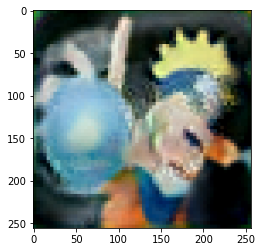

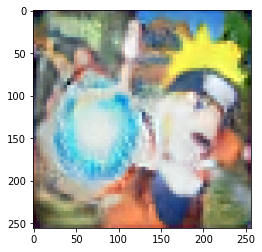

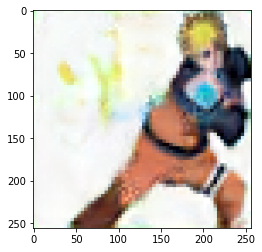

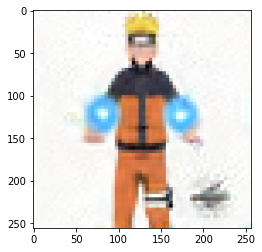

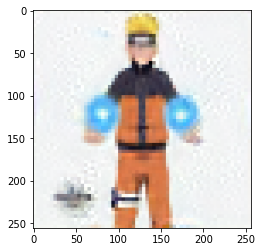

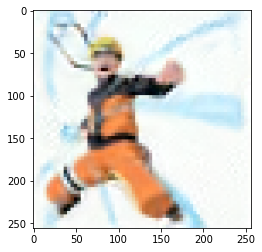

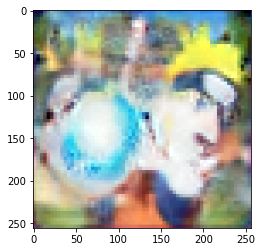

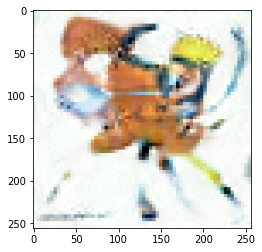

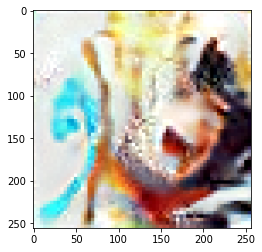

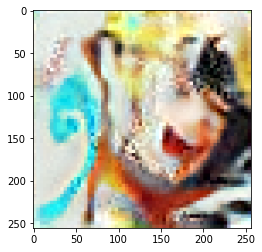

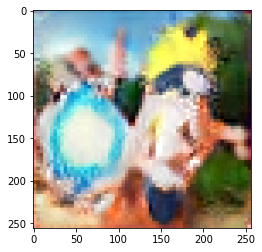

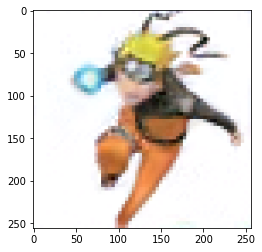

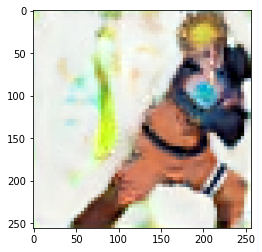

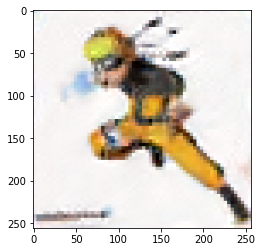

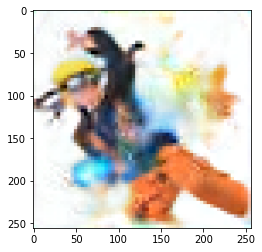

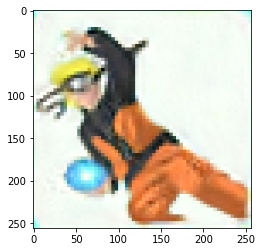

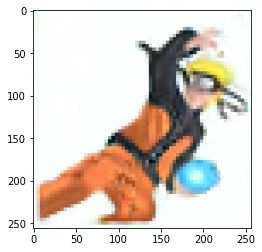

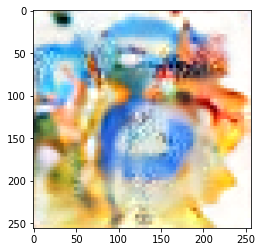

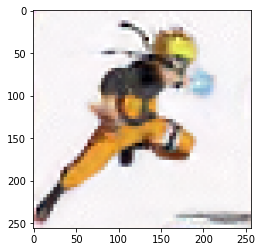

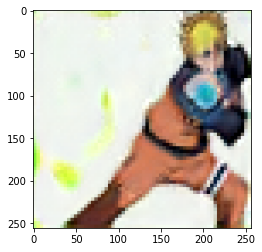

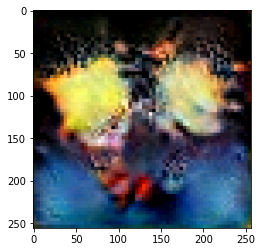

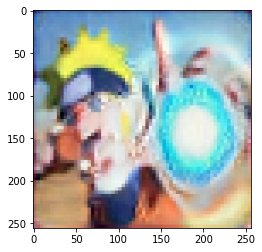

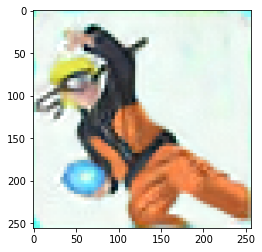

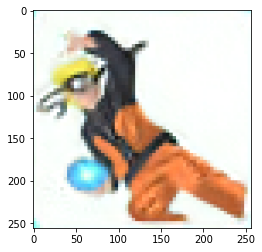

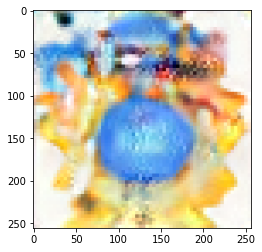

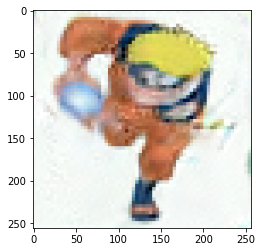

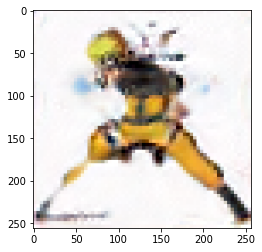

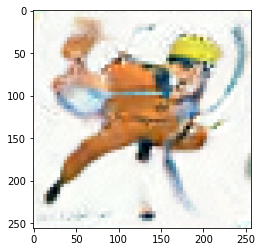

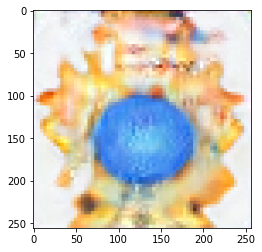

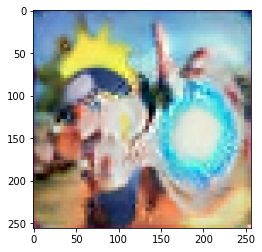

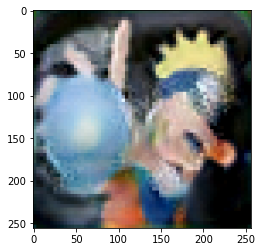

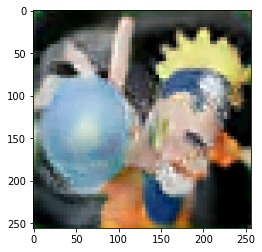

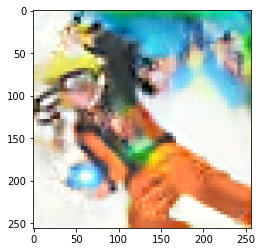

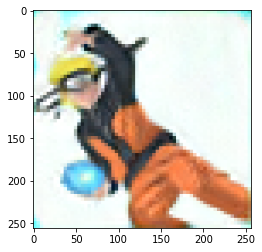

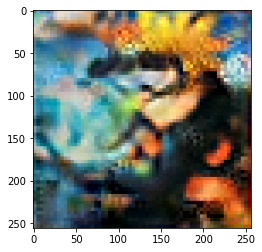

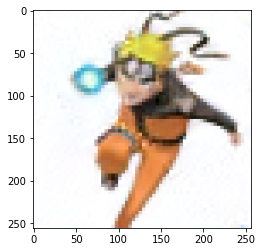

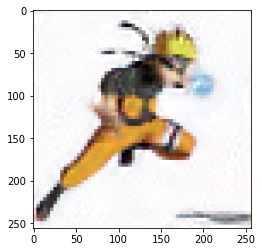

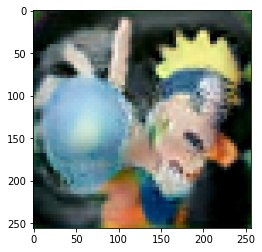

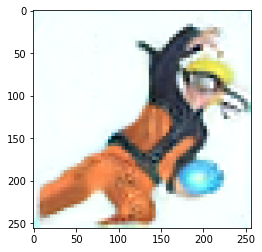

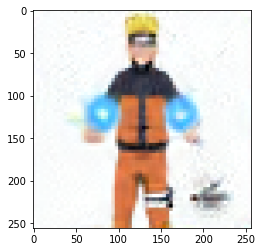

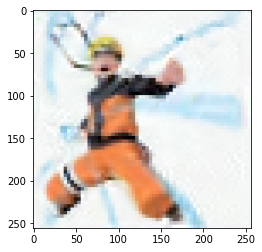

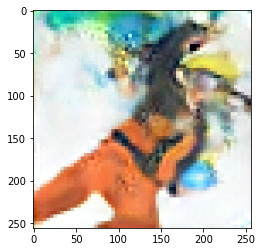

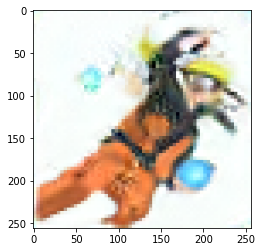

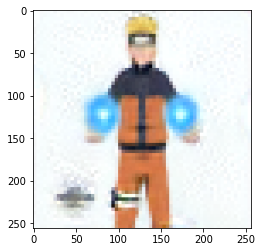

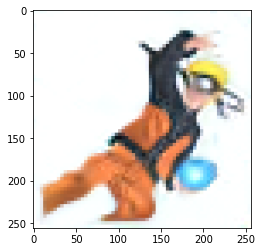

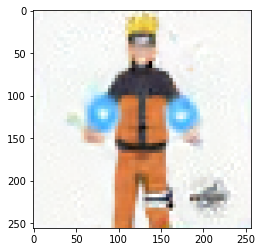

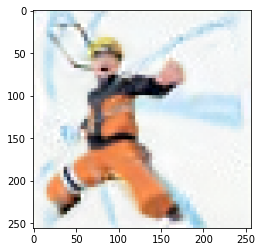

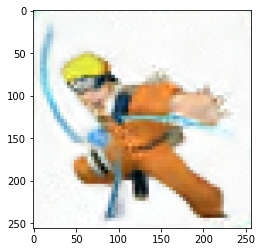

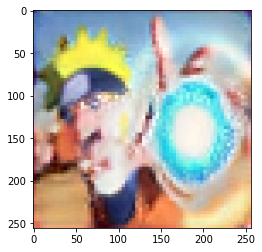

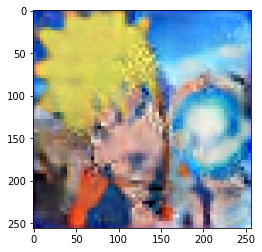

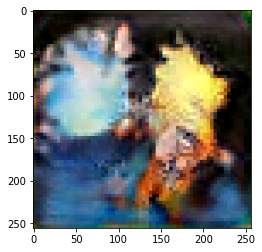

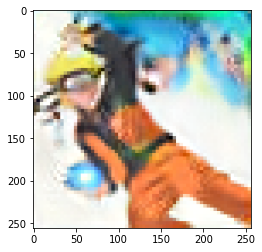

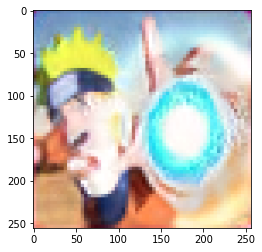

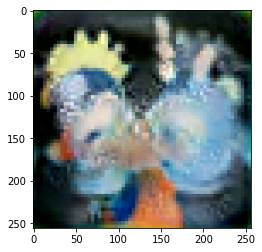

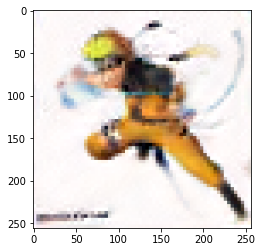

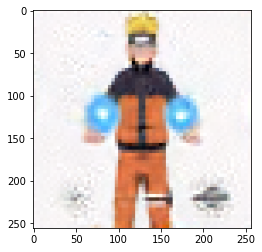

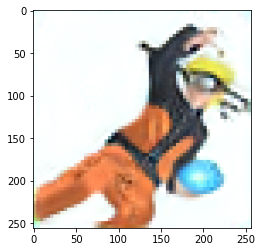

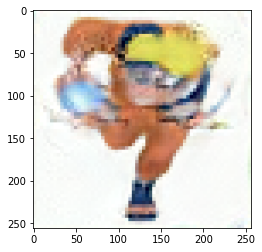

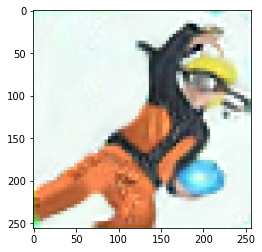

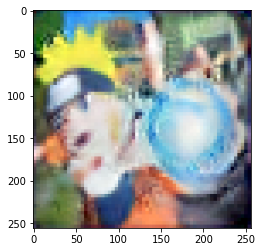

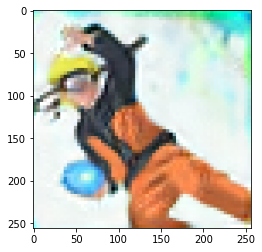

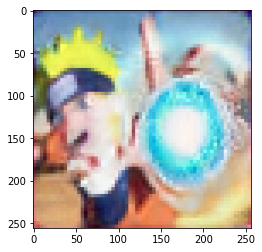

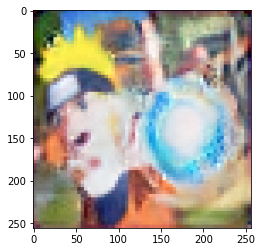

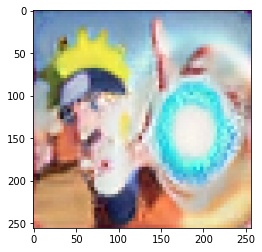

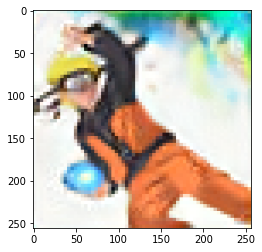

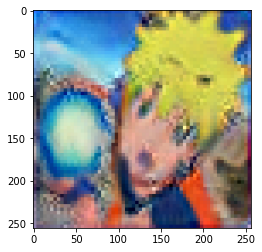

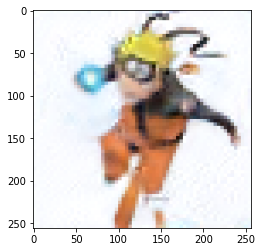

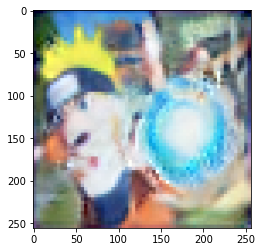

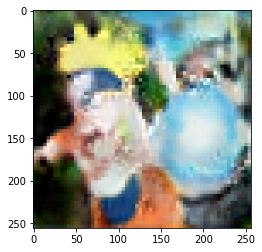

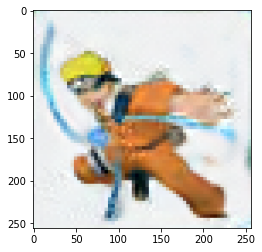

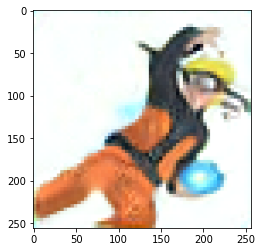

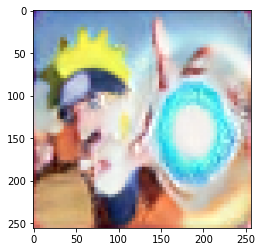

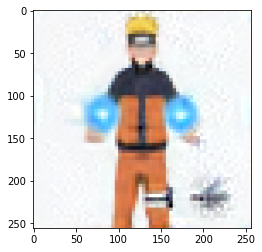

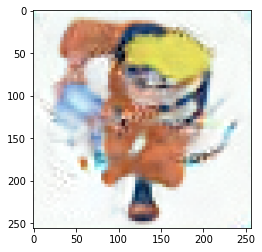

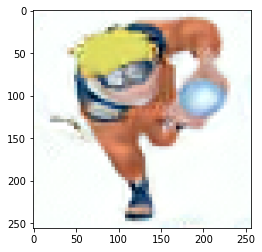

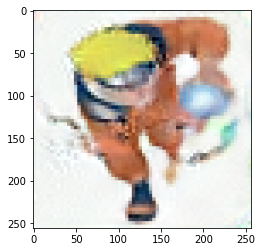

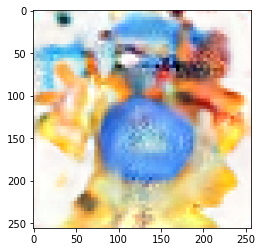

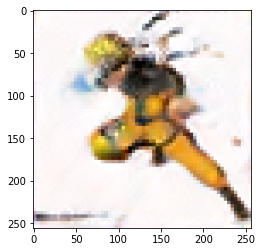

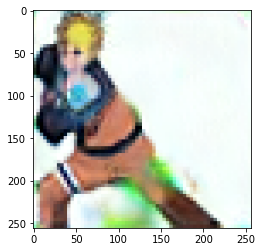

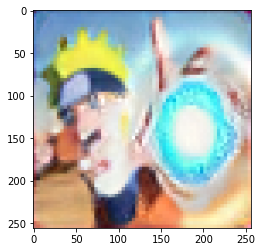

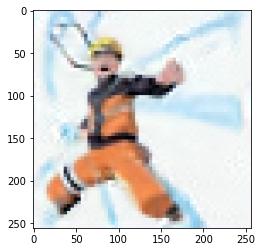

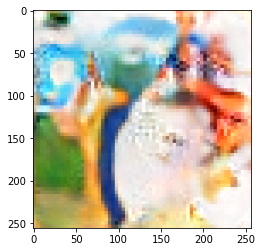

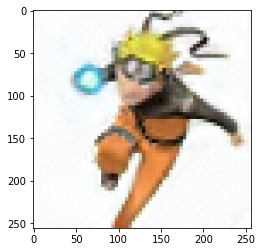

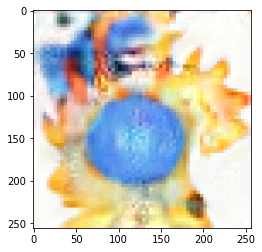

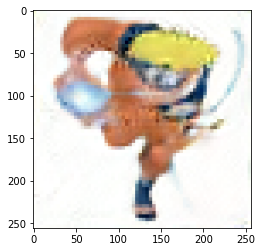

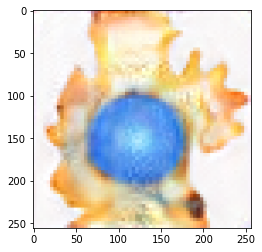

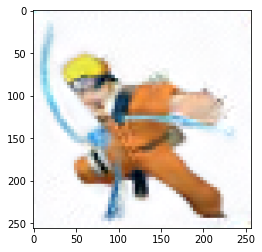

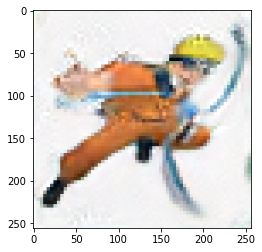

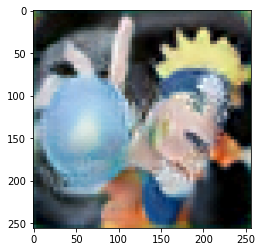

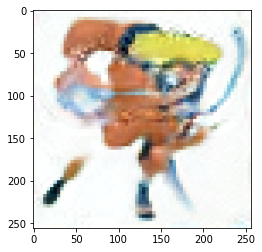

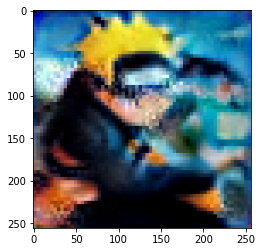

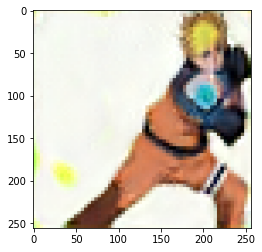

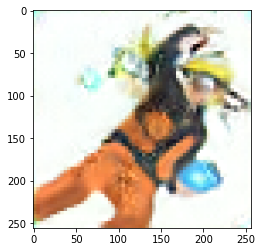

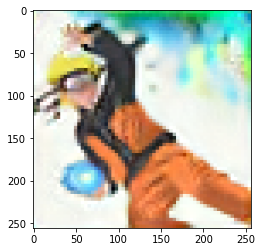

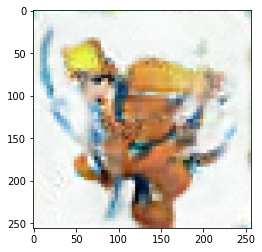

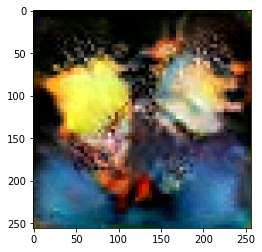

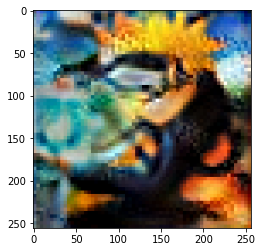

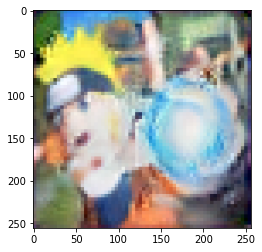

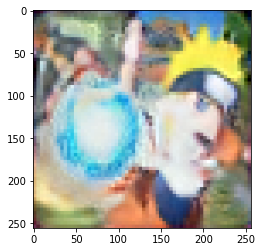

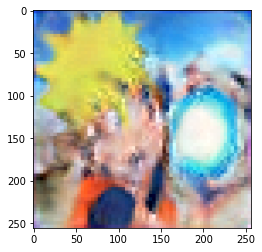

In [ ]:
# Pick latent vector.
rnd = np.random.RandomState()
latents = rnd.randn(100, Gs.input_shape[1])

# Generate image.
fmt = dict(func=dnnlib.tflib.convert_images_to_uint8, nchw_to_nhwc=True)
images = Gs.run(latents, None, truncation_psi=0.7, randomize_noise=True, output_transform=fmt)
for img in images:
    imgplot = plt.imshow(img)
    plt.show()